# Source of Alzheimer's MRI Scan Images Used for Model Training:

https://www.kaggle.com/datasets/yasserhessein/dataset-alzheimer?resource=download

In [131]:
%%time
#importing every library we will use for this project
from torch import nn, save, load
from torch.optim import Adam
from torch.utils.data import Dataset 
from torch.utils.data import DataLoader 
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch
import matplotlib.pyplot as plt
import numpy as np
import os 
import cv2 as cv

#File paths containing the training and testing data (images of individual MRI for different severity levels for Alzheimers)
train_path = "c:/Users/ricky/Desktop/Alzheimer_Resume_Project/Alzheimers_Dataset/train"
test_path = "c:/Users/ricky/Desktop/Alzheimer_Resume_Project/Alzheimers_Dataset/test"
print(train_path)
print(test_path)

#Establishing connection with training and testing folders
train_files = os.listdir(train_path)
test_files = os.listdir(test_path)
# print(train_files)
# print(test_files)

#Establishing connection with the images contained in each class of folder
for f in range(len(train_files)):
    train_files[f]=train_path+"/"+train_files[f]
#     f=train_path + "/" + f
print(train_files)


for f in range(len(test_files)):
    test_files[f]=test_path+"/"+test_files[f]
#     f=train_path + "/" + f
print(test_files)

#Establishing connection with the images contained in each class of folder

#For the training images
training_images = []
for folders in train_files:
    print(folders.split('/')[-1])
    print(len(os.listdir(folders)))
    for images in range(len(os.listdir(folders))):
        #print(folders + "/" + os.listdir(folders)[images])
        training_images.append([folders.split('/')[-1], folders + "/" + os.listdir(folders)[images]])
    
    #print(os.listdir(folders))
#print(training_images)

#For the testing images
testing_images = []
for folders in test_files:
    print(folders.split('/')[-1])
    print(len(os.listdir(folders)))
    for images in range(len(os.listdir(folders))):
        #print(folders + "/" + os.listdir(folders)[images])
        testing_images.append([folders.split('/')[-1], folders + "/" + os.listdir(folders)[images]])
    
    #print(os.listdir(folders))
#print(testing_images)



c:/Users/ricky/Desktop/Alzheimer_Resume_Project/Alzheimers_Dataset/train
c:/Users/ricky/Desktop/Alzheimer_Resume_Project/Alzheimers_Dataset/test
['c:/Users/ricky/Desktop/Alzheimer_Resume_Project/Alzheimers_Dataset/train/MildDemented', 'c:/Users/ricky/Desktop/Alzheimer_Resume_Project/Alzheimers_Dataset/train/ModerateDemented', 'c:/Users/ricky/Desktop/Alzheimer_Resume_Project/Alzheimers_Dataset/train/NonDemented', 'c:/Users/ricky/Desktop/Alzheimer_Resume_Project/Alzheimers_Dataset/train/VeryMildDemented']
['c:/Users/ricky/Desktop/Alzheimer_Resume_Project/Alzheimers_Dataset/test/MildDemented', 'c:/Users/ricky/Desktop/Alzheimer_Resume_Project/Alzheimers_Dataset/test/ModerateDemented', 'c:/Users/ricky/Desktop/Alzheimer_Resume_Project/Alzheimers_Dataset/test/NonDemented', 'c:/Users/ricky/Desktop/Alzheimer_Resume_Project/Alzheimers_Dataset/test/VeryMildDemented']
MildDemented
717
ModerateDemented
52
NonDemented
2560
VeryMildDemented
1792
MildDemented
179
ModerateDemented
12
NonDemented
640
Ve

In [162]:
# print(testing_images)
# print(training_images)


c:/Users/ricky/Desktop/Alzheimer_Resume_Project/Alzheimers_Dataset/test/MildDemented/26 (19).jpg


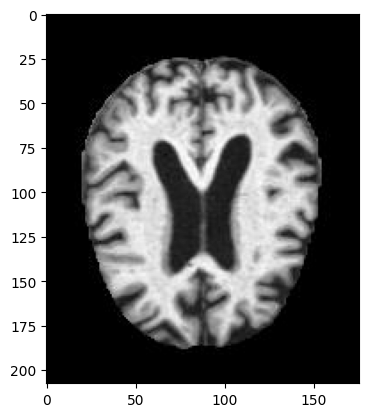

In [132]:

%matplotlib inline

#Prints an image from the testing section
print(testing_images[0][1])

img = cv.imread(testing_images[0][1],0)

#cv.imshow("Display window", img)
# cv.waitKey(0)
plt.imshow(img,cmap='gray')
plt.show()

c:/Users/ricky/Desktop/Alzheimer_Resume_Project/Alzheimers_Dataset/train/MildDemented/mildDem118.jpg


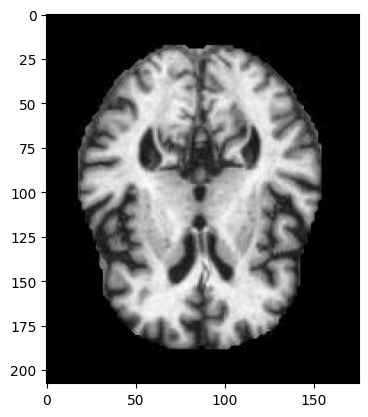

In [149]:
%matplotlib inline

#Prints an image from the training section

print(training_images[22][1])

img = cv.imread(training_images[22][1],0)

#cv.imshow("Display window", img)
# cv.waitKey(0)
plt.imshow(img,cmap='gray')
plt.show()

In [134]:
# Given the filepaths for every image, these now need to be translated into numpy arrays, 
# which are then converted into tensor data structures

#For computational efficiency, translating images to arrays based on grayscale is generally more computationally efficient
# In our use case, grayscale is also accurate to the original images, since MRI scans are already grayscale images

#Converting classes into integers, which can be referenced later and understood by the training model
classes = ["NonDemented", "VeryMildDemented", "MildDemented", "ModerateDemented"]

#Process training images into training data:
training_data = []
for files in training_images:
    image_read = cv.imread(files[1], 0)

    norm_read = (image_read - image_read.mean())/image_read.std() #Normalizes the input data read from the grayscale image range 

    training_data.append((torch.from_numpy(np.expand_dims(norm_read, axis =0)), classes.index(files[0])))
    # print(files[0])
    # print(files[1])
# # training_data = np.asarray(training_data)
#training_data = torch.tensor(training_data)

testing_data = []
for files in testing_images:
    # testing_data.append((torch.from_numpy(np.expand_dims(cv.imread(files[1], 0), axis =0)), classes.index(files[0])))
    image_read = cv.imread(files[1], 0)

    norm_read = (image_read - image_read.mean())/image_read.std() #Normalizes the input data read from the grayscale image range 

    testing_data.append((torch.from_numpy(np.expand_dims(norm_read, axis =0)), classes.index(files[0])))

    # print(files[0])
    # print(files[1])

print("Example of Training Data:")
print(training_data[0])

print("Example of Testing Data:")
print(testing_data[0])




Example of Training Data:
(tensor([[[-0.8462, -0.8462, -0.8462,  ..., -0.8462, -0.8462, -0.8462],
         [-0.8462, -0.8462, -0.8462,  ..., -0.8462, -0.8462, -0.8462],
         [-0.8462, -0.8462, -0.8462,  ..., -0.8462, -0.8462, -0.8462],
         ...,
         [-0.8462, -0.8462, -0.8462,  ..., -0.8462, -0.8462, -0.8462],
         [-0.8462, -0.8462, -0.8462,  ..., -0.8462, -0.8462, -0.8462],
         [-0.8462, -0.8462, -0.8462,  ..., -0.8462, -0.8462, -0.8462]]],
       dtype=torch.float64), 2)
Example of Testing Data:
(tensor([[[-0.8024, -0.8024, -0.8024,  ..., -0.8024, -0.8024, -0.8024],
         [-0.8024, -0.8024, -0.8024,  ..., -0.8024, -0.8024, -0.8024],
         [-0.8024, -0.8024, -0.8024,  ..., -0.8024, -0.8024, -0.8024],
         ...,
         [-0.8024, -0.8024, -0.8024,  ..., -0.8024, -0.8024, -0.8024],
         [-0.8024, -0.8024, -0.8024,  ..., -0.8024, -0.8024, -0.8024],
         [-0.8024, -0.8024, -0.8024,  ..., -0.8024, -0.8024, -0.8024]]],
       dtype=torch.float64), 2)

In [135]:
print("There are",len(training_data), "samples of training data with a tensor shape of", training_data[0][0].shape)
print()
print("There are",len(testing_data), "samples of testing data with a tensor shape of", testing_data[0][0].shape)


There are 5121 samples of training data with a tensor shape of torch.Size([1, 208, 176])

There are 1279 samples of testing data with a tensor shape of torch.Size([1, 208, 176])


In [136]:
# Batches are extracted from the testing and training data, as that can help reduce overfitting
# and help improve the overall efficiency of the model. 
  
# defining the Training Dataset class 
class train_data_set(Dataset): 
    def __init__(self): 
        numbers = training_data 
        self.data = numbers 
  
    def __len__(self): 
        return len(self.data) 
  
    def __getitem__(self, index): 
        return self.data[index] 
  
  
training_dataset = train_data_set() 

# defining the Testing Dataset class 
class test_data_set(Dataset): 
    def __init__(self): 
        numbers = testing_data 
        self.data = numbers 
  
    def __len__(self): 
        return len(self.data) 
  
    def __getitem__(self, index): 
        return self.data[index] 
  
  
testing_dataset = test_data_set() 

# Implementing dataloader for each dataset
train_dataloader = DataLoader(training_dataset, batch_size=30, shuffle=True) #, shuffle=True
test_dataloader = DataLoader(testing_dataset, batch_size=30, shuffle=True) 

print(train_dataloader)
print(test_dataloader)
print()

number_batches = 0
for i, batch in enumerate(test_dataloader): 
    number_batches = i

print("There are a total of",number_batches, "batches of",test_dataloader.batch_size, "from the Testing Dataset")

for i, batch in enumerate(train_dataloader): 
    number_batches = i

print("There are a total of",number_batches, "batches of",train_dataloader.batch_size, "from the Training Dataset")


There are a total of 42 batches of 30 from the Testing Dataset
There are a total of 170 batches of 30 from the Training Dataset


In [173]:
%%time
#Now that the training and testing data are extracted into a useable format, 
# we can begin to design the models that will be tested with this data
from torch.optim import Adam

# Convolutional Neural Network
class CCNImageClassifier(torch.nn.Module): 
    def __init__(self):
        super().__init__()
        self.model = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, (3,3)), 
            # torch.nn.ReLU(),
            torch.nn.BatchNorm2d(32), #https://proceedings.mlr.press/v37/ioffe15.pdf
            torch.nn.ReLU(),
            
            torch.nn.Conv2d(32, 32, (3,3)), 
            # torch.nn.ReLU(),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(),

            torch.nn.MaxPool2d(3, stride=3),
            torch.nn.Conv2d(32, 64, (3,3)), 
            # torch.nn.ReLU(),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(),

            # torch.nn.MaxPool2d(2, stride=2),
            torch.nn.Conv2d(64, 64, (3,3)), 
            # torch.nn.ReLU(),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(),

            # torch.nn.Conv2d(64, 64, (3,3)), 
            # torch.nn.ReLU(),
            # torch.nn.BatchNorm2d(64),
            torch.nn.MaxPool2d(3, stride=3),
            # torch.nn.BatchNorm2d(64),

            # torch.nn.Conv2d(64, 64, (3,3)), 
            # torch.nn.ReLU(),
            # torch.nn.BatchNorm2d(64),
            # torch.nn.Conv2d(64, 64, (3,3)), 
            # torch.nn.ReLU(),
            # torch.nn.BatchNorm2d(64),

            torch.nn.Flatten(), 
            torch.nn.Dropout(0.5),
            torch.nn.Linear(64*21*17, 4), #64*48*40
            # torch.nn.ReLU(),
            # # torch.nn.BatchNorm1d(30720),
            # # torch.nn.Linear(30720, 4000),
            # # torch.nn.ReLU(),
            # torch.nn.BatchNorm1d(100),
            # torch.nn.Dropout(0.5),

            # # torch.nn.Dropout(0.6),
            # torch.nn.Linear(100, 4)

        )

    def forward(self, x): 
        return self.model(x)

# Instance of the  convolutional neural network, loss, optimizer 
clf = CCNImageClassifier().to('cpu')
opt = Adam(clf.parameters(), lr=1e-3)
loss_fn = torch.nn.CrossEntropyLoss() 

# Training flow 
if __name__ == "__main__": 
    #Keep track of classification accuracy and validation accuracy as training progresses
    Validation = []
    EpochAccuracy = []
    for epoch in range(25): # train for 20 epochs
        total_correct = 0
        total_samples = 0

        for batch in train_dataloader: 
            X,y = batch 
            X, y = X.float().to('cpu'), y.to('cpu') #Input tensor values are translated to float variables to match bias variable type
            yhat = clf(X) 
            loss = loss_fn(yhat, y) 

            # Apply backprop 
            opt.zero_grad()
            loss.backward() 
            opt.step() 

            # Calculate Classification Training Accuracy
            _, predicted = yhat.max(1)
            total_correct += (predicted == y).sum().item()
            total_samples += y.size(0)

        Accuracy = total_correct / total_samples *100
        EpochAccuracy.append(Accuracy)

        #Validation Tracking
        with torch.no_grad():  # deactivate autograd engine to reduce memory usage and speed up computations
            valid_correct = 0
            valid_samples = 0
            for data in test_dataloader:
                X_valid,y_valid = data  # replace 'device' with your device, e.g., 'cuda' or 'cpu'
                X_valid, y_valid = X_valid.float().to('cpu'), y_valid.to('cpu')

                valid_outputs = clf(X_valid)
                # Calculate Classification Training Accuracy
                _, valid_predicted = valid_outputs.max(1)
                valid_correct += (valid_predicted == y_valid).sum().item()
                valid_samples += y_valid.size(0)

            ValidationAccuracy = valid_correct / valid_samples *100
            Validation.append(ValidationAccuracy)

        

        print(f"Epoch:{epoch} loss is {loss.item()}, Training Accuracy is {Accuracy: .2f}% , Validation Accuracy is {ValidationAccuracy: .2f}%")

    torch.save(clf.state_dict(), "C:/Users/ricky/model_state.pt") #Saves model
    

Epoch:0 loss is 2.1033084392547607, Training Accuracy is  49.15% , Validation Accuracy is  51.13%
Epoch:1 loss is 0.9252530336380005, Training Accuracy is  57.94% , Validation Accuracy is  42.46%
Epoch:2 loss is 0.9205678105354309, Training Accuracy is  65.85% , Validation Accuracy is  53.79%
Epoch:3 loss is 0.7347142696380615, Training Accuracy is  70.30% , Validation Accuracy is  52.46%
Epoch:4 loss is 0.5193644165992737, Training Accuracy is  73.11% , Validation Accuracy is  56.84%
Epoch:5 loss is 0.8448755145072937, Training Accuracy is  77.82% , Validation Accuracy is  59.66%
Epoch:6 loss is 0.33223235607147217, Training Accuracy is  80.55% , Validation Accuracy is  58.17%
Epoch:7 loss is 0.17740924656391144, Training Accuracy is  83.79% , Validation Accuracy is  61.61%
Epoch:8 loss is 0.2504860460758209, Training Accuracy is  86.49% , Validation Accuracy is  57.47%
Epoch:9 loss is 0.21415774524211884, Training Accuracy is  86.99% , Validation Accuracy is  61.61%
Epoch:10 loss is 

Implement early stopping, based on visible validation accuracy training

Implement transfer learning with pretrained model, at some point

Automate Hyperparameter Tuning: Use tools like Grid Search or Random Search to automate the process of hyperparameter tuning. Libraries such as scikit-learn provide functions for hyperparameter optimization, and tools like Optuna can automate the search process.
https://www.youtube.com/watch?v=xP9l9MptIZo

In [12]:
torch.save(clf.state_dict(), "c:/Users/ricky/Desktop/Alzheimer_Resume_Project/model_state.pt") #Saves model

In [178]:
print(Validation)
print(EpochAccuracy)

[51.133698201720094, 42.45504300234558, 53.79202501954652, 52.462861610633304, 56.84128225175918, 59.65598123534011, 58.1704456606724, 61.6106333072713, 57.466770914777165, 61.6106333072713, 64.19077404222048, 63.01798279906177, 62.62705238467553, 63.330727130570764, 65.98905394839718, 66.06724003127444, 66.14542611415169, 68.02189210320563, 65.8326817826427, 65.44175136825645, 68.02189210320563, 67.24003127443315, 68.10007818608288, 66.22361219702893, 65.8326817826427]
[49.15055653192736, 57.93790275336848, 65.8465143526655, 70.298769771529, 73.11072056239016, 77.81683264987306, 80.55067369654364, 83.79222808045303, 86.48701425502831, 86.99472759226714, 90.08006248779536, 91.23218121460653, 91.87658660417887, 93.45830892403826, 93.65358328451474, 94.43468072642062, 95.1767232962312, 94.39562585432533, 95.95782073813707, 95.95782073813707, 95.93829330208943, 97.22710408123415, 96.89513766842414, 97.38332356961531, 96.95371997656707]


In [115]:
testest = nn.Dropout(p=0.3)
inputtest = torch.randn(3, 3)
output1 = testest(inputtest)
output1

tensor([[ 0.0000, -0.0455, -0.8402],
        [ 1.8876,  2.3053,  0.0000],
        [ 2.4785,  0.3512,  0.9290]])

In [180]:
# Shown below, this process reloads the model that has been previously trained

class CCNImageClassifier(torch.nn.Module): 
    def __init__(self):
        super().__init__()
        self.model = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, (3,3)), 
            # torch.nn.ReLU(),
            torch.nn.BatchNorm2d(32), #https://proceedings.mlr.press/v37/ioffe15.pdf
            torch.nn.ReLU(),
            
            torch.nn.Conv2d(32, 32, (3,3)), 
            # torch.nn.ReLU(),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(),

            torch.nn.MaxPool2d(3, stride=3),
            torch.nn.Conv2d(32, 64, (3,3)), 
            # torch.nn.ReLU(),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(),

            # torch.nn.MaxPool2d(2, stride=2),
            torch.nn.Conv2d(64, 64, (3,3)), 
            # torch.nn.ReLU(),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(),

            # torch.nn.Conv2d(64, 64, (3,3)), 
            # torch.nn.ReLU(),
            # torch.nn.BatchNorm2d(64),
            torch.nn.MaxPool2d(3, stride=3),
            # torch.nn.BatchNorm2d(64),

            # torch.nn.Conv2d(64, 64, (3,3)), 
            # torch.nn.ReLU(),
            # torch.nn.BatchNorm2d(64),
            # torch.nn.Conv2d(64, 64, (3,3)), 
            # torch.nn.ReLU(),
            # torch.nn.BatchNorm2d(64),

            torch.nn.Flatten(), 
            torch.nn.Dropout(0.5),
            torch.nn.Linear(64*21*17, 4), #64*48*40
            # torch.nn.ReLU(),
            # # torch.nn.BatchNorm1d(30720),
            # # torch.nn.Linear(30720, 4000),
            # # torch.nn.ReLU(),
            # torch.nn.BatchNorm1d(100),
            # torch.nn.Dropout(0.5),

            # # torch.nn.Dropout(0.6),
            # torch.nn.Linear(100, 4)

        )

    def forward(self, x): 
        return self.model(x)

# Instance of the  convolutional neural network, loss, optimizer 
clf = CCNImageClassifier().to('cpu')
# opt = Adam(clf.parameters(), lr=1e-3)
# loss_fn = torch.nn.CrossEntropyLoss() 

#Later to restore:
clf.load_state_dict(torch.load("C:/Users/ricky/model_state.pt"))
clf.eval()

CCNImageClassifier(
  (model): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (11): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    (14): Flatten(start_dim=1, end_dim=-1)
    (15): Dropout(p=0.5, inplace=False)
    (16): Linear(in_features=22848, out_feature

VeryMildDemented
1
tensor(0)
tensor([[ 28.3678,  -6.7127, -13.8931, -27.2922]])
torch.return_types.max(
values=tensor([28.3678]),
indices=tensor([0]))


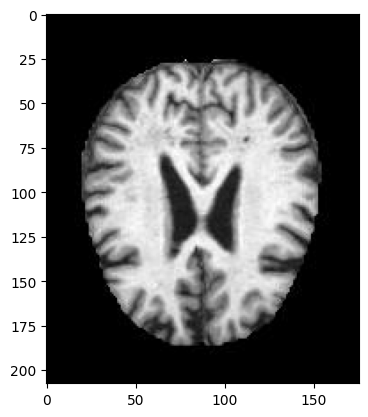

Training Accuracy = 99.7461433313806 %
Testing Accuracy = 72.24394057857701 %
CPU times: total: 8min 43s
Wall time: 2min 19s


In [181]:
%%time
classes = ["NonDemented", "VeryMildDemented", "MildDemented", "ModerateDemented"]

# Prediction for Single Selected Image
test_number = 1000

test_img = cv.imread(testing_images[test_number][1],0)

norm_read = (test_img - test_img.mean())/test_img.std() #Normalizes the input data read from the grayscale image range 

test_tensor = ToTensor()(test_img).unsqueeze(0).to('cpu')

print(testing_images[test_number][0])
print(classes.index(testing_images[test_number][0]))

clf.eval()
with torch.no_grad():
    print(torch.argmax(clf(test_tensor)))
    print(clf(test_tensor))
    print(clf(test_tensor).max(1))

plt.imshow(test_img,cmap='gray')
plt.show()

#Tests accuracy with training data
with torch.no_grad():  # deactivate autograd engine to reduce memory usage and speed up computations
    total_correct = 0
    total_samples = 0
    for data in train_dataloader:
        X,y = data 
        X, y = X.float().to('cpu'), y.to('cpu')

        outputs = clf(X)
        # Calculate Classification Training Accuracy
        _, predicted = outputs.max(1)
        total_correct += (predicted == y).sum().item()
        total_samples += y.size(0)
        # print(total_correct/total_samples)
    Accuracy = total_correct / total_samples *100
    print("Training Accuracy =",Accuracy,"%")
    
#Tests accuracy for testing data
with torch.no_grad():  # deactivate autograd engine to reduce memory usage and speed up computations
    total_correct = 0
    total_samples = 0
    for data in test_dataloader:
        X,y = data  # replace 'device' with your device, e.g., 'cuda' or 'cpu'
        X, y = X.float().to('cpu'), y.to('cpu')

        outputs = clf(X)
        # Calculate Classification Training Accuracy
        _, predicted = outputs.max(1)
        total_correct += (predicted == y).sum().item()
        total_samples += y.size(0)
        # print(total_correct/total_samples)
    Accuracy = total_correct / total_samples *100
    print("Testing Accuracy =",Accuracy, "%")




0
NonDemented
['VeryMildDemented' 'VeryMildDemented' 'VeryMildDemented' ...
 'MildDemented' 'NonDemented' 'NonDemented']
['VeryMildDemented' 'VeryMildDemented' 'VeryMildDemented' ...
 'MildDemented' 'NonDemented' 'NonDemented']


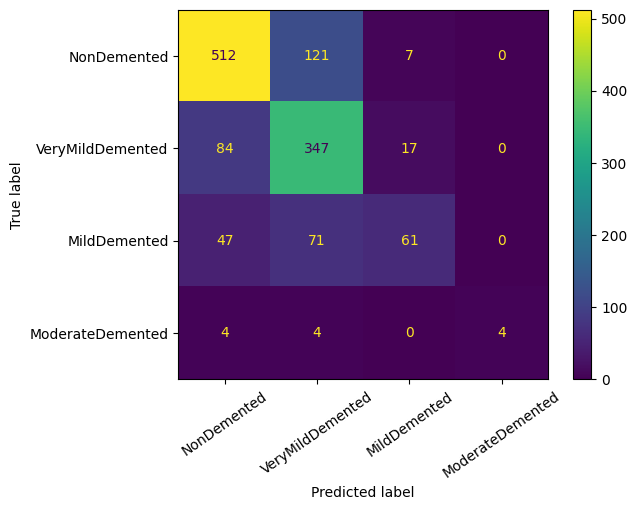

In [179]:
with torch.no_grad():  # deactivate autograd engine to reduce memory usage and speed up computations
    predictions_list = np.array([])
    total_samples_list = np.array([])
    for data in test_dataloader:
        X,y = data  # replace 'device' with your device, e.g., 'cuda' or 'cpu'
        X, y = X.float().to('cpu'), y.to('cpu')
        total_samples_list = np.concatenate((total_samples_list, y.numpy()), axis=None)
        # print(total_samples_list)

        outputs = clf(X)
        _, predicted = outputs.max(1)
        predictions_list = np.concatenate((predictions_list, predicted.numpy()), axis=None)
        
total_samples_list=total_samples_list.astype(object)
predictions_list=predictions_list.astype(object)

#Constructs a Confusion Matrix
classes = ["NonDemented", "VeryMildDemented", "MildDemented", "ModerateDemented"]

print(classes.index("NonDemented"))
print(classes[classes.index("NonDemented")])

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# y_test = np.array([0,1,2,3,1], dtype=object)
# predictions = np.array([0,1,2,3,0], dtype=object)
for n in range(4):
    total_samples_list[total_samples_list==n] = classes[n]
    predictions_list[predictions_list==n] = classes[n]

print(total_samples_list)
print(predictions_list)
cm = confusion_matrix(total_samples_list, predictions_list, labels=classes)#, labels=classes
ConfusionMatrixDisplay(cm, display_labels=classes).plot(xticks_rotation = 35)


0
NonDemented
['NonDemented' 'VeryMildDemented' 'NonDemented' ... 'MildDemented'
 'NonDemented' 'MildDemented']
['NonDemented' 'VeryMildDemented' 'NonDemented' ... 'MildDemented'
 'NonDemented' 'MildDemented']


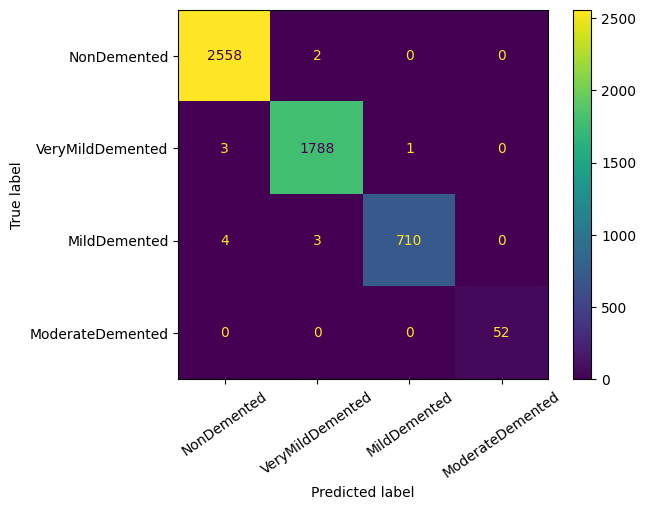

In [177]:
with torch.no_grad():  # deactivate autograd engine to reduce memory usage and speed up computations
    predictions_list = np.array([])
    total_samples_list = np.array([])
    for data in train_dataloader:
        X,y = data  # replace 'device' with your device, e.g., 'cuda' or 'cpu'
        X, y = X.float().to('cpu'), y.to('cpu')
        total_samples_list = np.concatenate((total_samples_list, y.numpy()), axis=None)
        # print(total_samples_list)

        outputs = clf(X)
        _, predicted = outputs.max(1)
        predictions_list = np.concatenate((predictions_list, predicted.numpy()), axis=None)
        
total_samples_list=total_samples_list.astype(object)
predictions_list=predictions_list.astype(object)

#Constructs a Confusion Matrix
classes = ["NonDemented", "VeryMildDemented", "MildDemented", "ModerateDemented"]

print(classes.index("NonDemented"))
print(classes[classes.index("NonDemented")])

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# y_test = np.array([0,1,2,3,1], dtype=object)
# predictions = np.array([0,1,2,3,0], dtype=object)
for n in range(4):
    total_samples_list[total_samples_list==n] = classes[n]
    predictions_list[predictions_list==n] = classes[n]

print(total_samples_list)
print(predictions_list)
cm = confusion_matrix(total_samples_list, predictions_list, labels=classes)#, labels=classes
ConfusionMatrixDisplay(cm, display_labels=classes).plot(xticks_rotation = 35)


In [169]:
# for n in train_dataloader:
#     print(n)
m = nn.MaxPool2d(2, stride=2)

#print(train_dataloader)
for n in train_dataloader:
    print(n[0].shape)
    print(m(n[0]).shape)
    print()

    X,y = n
    #print(X[0].numpy().tolist())
    print(X.float()[0])
    print(y)
    break

torch.Size([30, 1, 208, 176])
torch.Size([30, 1, 104, 88])

tensor([[[-0.8367, -0.8367, -0.8367,  ..., -0.8367, -0.8367, -0.8367],
         [-0.8367, -0.8367, -0.8367,  ..., -0.8367, -0.8367, -0.8367],
         [-0.8367, -0.8367, -0.8367,  ..., -0.8367, -0.8367, -0.8367],
         ...,
         [-0.8367, -0.8367, -0.8367,  ..., -0.8367, -0.8367, -0.8367],
         [-0.8367, -0.8367, -0.8367,  ..., -0.8367, -0.8367, -0.8367],
         [-0.8367, -0.8367, -0.8367,  ..., -0.8367, -0.8367, -0.8367]]])
tensor([2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 1, 1, 3, 0, 1, 0, 1, 0, 1, 0,
        2, 1, 0, 0, 0, 0])


In [171]:
input = torch.randn(30, 1, 208, 176)

Conv1 = torch.nn.Conv2d(1, 32, (3,3))
Conv1_2 = torch.nn.Conv2d(32, 32, (3,3))
Relu = torch.nn.ReLU()
Max = torch.nn.MaxPool2d(2, stride=2)
Max3 = torch.nn.MaxPool2d(3, stride=3)
# print(m1(input).shape)
Conv2 = torch.nn.Conv2d(32, 64, (3,3))
Conv3 = torch.nn.Conv2d(64, 64, (3,3))
input = Conv1(input)# torch.nn.Conv2d(1, 32, (3,3))
input = Relu(input)# torch.nn.ReLU(),
input = Conv1_2(input)# torch.nn.Conv2d(1, 32, (3,3))
input = Relu(input)# torch.nn.ReLU(),
input = Max3(input)# torch.nn.MaxPool2d(2, stride=2),
input = Conv2(input)# torch.nn.Conv2d(32, 64, (3,3)), 
input = Relu(input)# torch.nn.ReLU()
# input = Max(input)# torch.nn.MaxPool2d(2, stride=2)
input = Conv3(input)# torch.nn.Conv2d(64, 64, (3,3))
input = Relu(input)# torch.nn.ReLU()
# input = Conv3(input)# torch.nn.Conv2d(64, 64, (3,3))
input = Relu(input)# torch.nn.ReLU()
input = Max3(input)# torch.nn.MaxPool2d(2, stride=2)

# input = Conv3(input)# torch.nn.Conv2d(32, 64, (3,3)), 
# input = Relu(input)# torch.nn.ReLU()
# # input = Max(input)# torch.nn.MaxPool2d(2, stride=2)
# input = Conv3(input)# torch.nn.Conv2d(64, 64, (3,3))
# input = Relu(input)# torch.nn.ReLU()


# torch.nn.Flatten()
#torch.nn.Linear(4*(208-6)*(176-6), 4)  
print(input.shape)
print(np.prod(np.array(list(input.shape[1:]))))

torch.Size([30, 64, 21, 17])
22848


In [ ]:
https://www.openfmri.org/dataset/

https://www.aylward.org/notes/open-access-medical-image-repositories

# Source of Website Image, with interesting description:

https://medpix.nlm.nih.gov/case?id=74571d08-b824-401c-bc40-375efe0347a7

In [169]:
# with torch.no_grad():  # deactivate autograd engine to reduce memory usage and speed up computations
#             valid_correct = 0
#             valid_samples = 0
#             for data in test_dataloader:
#                 X_valid,y_valid = data  # replace 'device' with your device, e.g., 'cuda' or 'cpu'
#                 X_valid, y_valid = X_valid.float().to('cpu'), y_valid.to('cpu')

#                 valid_outputs = clf(X_valid)
#                 # Calculate Classification Training Accuracy
#                 _, valid_predicted = valid_outputs.max(1)
#                 valid_correct += (valid_predicted == y_valid).sum().item()
#                 valid_samples += y_valid.size(0)
#                 print(valid_outputs)
#                 print(valid_outputs.max(1))
#                 print(valid_predicted)
#                 print(y_valid)
#                 print(valid_correct, valid_samples)
#                 break

tensor([[  2.0552,   3.5656,   0.7816,  -7.0955],
        [  0.9949,  -0.1698,   2.9624,  -8.6223],
        [  2.1589,   1.0011,   1.4086,  -6.4414],
        [  2.5531,   2.9480,   1.3361,  -6.7049],
        [ -0.0542,   3.7865,   3.4802,  -7.0420],
        [  2.0333,   0.2156,  -2.8826,  -2.0693],
        [  1.7068,   0.6551,   1.6608,  -6.6323],
        [  3.3875,   1.6700,   0.6751,  -6.7001],
        [  5.4874,  -0.4351,  -1.2809,  -5.0159],
        [  2.7196,   2.5286,   0.1485,  -7.0732],
        [  2.8130,   2.5107,   0.0639,  -5.2685],
        [  3.6626,   3.2328,  -1.1730,  -6.5952],
        [  3.2059,   2.2418,  -1.1382,  -6.4007],
        [  2.7222,   1.9744,   0.9705,  -5.5098],
        [  1.8269,   2.7000,   2.9475, -10.2911],
        [  3.3433,   2.1546,   1.7563,  -8.5419],
        [  2.4702,   2.1312,   0.3740,  -7.6027],
        [  4.9914,   0.8049,   0.8032,  -8.5364],
        [  1.2676,   3.3003,  -0.1472,  -5.6443],
        [  4.3162,   2.3034,  -0.6376,  -6.8483],
